<a href="https://colab.research.google.com/github/Dohy-Lee/NLP_by_Pytorch/blob/main/ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

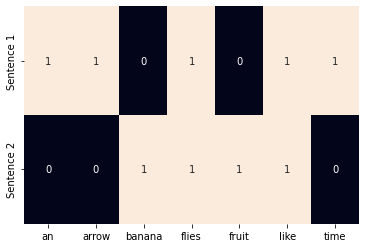

In [ ]:
#원-핫 벡터 만들기
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ['Time flies like an arrow.',
          'Fruit flies like a banana.']
one_hot_vectorizer = CountVectorizer(binary=True) #binary = True를 지정함으로써 원-핫 인코딩으로 변환, 기본값은 False인데 이러면 단어 등장 횟수를 기록한 TF표현을 만듦, 또한 이 클래스는 한 글자 단어는 무시함.
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()  # toarray를 쓴 이유 : CountVectorizer는 희소 행렬(행렬값 대부분 0)을 반환하기때문에, toarray로 밀집 행렬(행렬값 대부분 0이 아닌 수)로 바꿔 출력
vocab = one_hot_vectorizer.get_feature_names()
sns.heatmap(one_hot, annot=True,
            cbar=False, xticklabels=vocab,
            yticklabels=['Sentence 1', 'Sentence 2'])

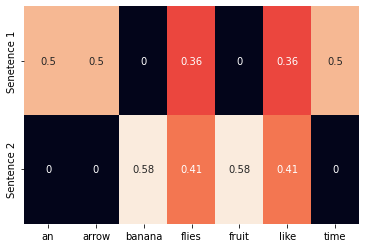

In [ ]:
#역문서 빈도(IDF) : 벡터 표현에서 흔한 토큰의 점수를 낮추고, 드문 토큰의 점수는 높임
#TF-IDF 점수 = TF(w)*IDF(W)
#TF-IDF 표현 만들기
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab,
            yticklabels=['Senetence 1', 'Sentence 2'])

$IDF(w) = \text{log} \left(\dfrac{N+1}{N_w+1}\right)+1$

첫 번째 문장의 'flies'와 'like'의 경우 TF = 1이므로 $\text{TF-IDF}=1\times\text{log}\left(\dfrac{2+1}{2+1}\right)+1=1$입니다.

단어 'an', 'arrow', 'time'의 경우 $N_w=1$입니다. 따라서 $\text{TF-IDF}=1\times\text{log}\left(\dfrac{2+1}{1+1}\right)+1=1.4054651081081644$입니다.

L2 정규화를 적용하면 'flies'와 'like'는 $\dfrac{1}{\sqrt{2\times1^2+3\times1.4054651081081644^2+}}=0.3552$가 됩니다.

'an', 'arrow', 'time'는 $\dfrac{1.4054651081081644}{\sqrt{2\times1^2+3\times1.4054651081081644^2+}}=0.4992$가 됩니다.

2를 곱한 것은 tf-idf 1에 해당하는 단어가 2개(files, like)이기 때문임
마찬가지로 3은 세 개의 단어(an, arrow, time)를 반영한 것

In [ ]:
#기계 번역, 요약, 질의응답 문제에서는 타깃도 텍스트이며 타깃 인코딩으로 원-핫 인코딩과 같은 방식을 사용함
#많은 NLP 작업(언어 모델링 등)은 타깃 인코딩으로 범주형 레이블을 사용함
#계산 그래프 : 수학식을 추상적으로 모델링한 것
#추론(예측) : 단순히 식에 대한 평가(계산 그래프의 정방향 계산)

## 텐서
* 스칼라는 하나의 숫자입니다.
* 벡터는 숫자의 배열입니다.
* 행렬은 숫자의 2-D 배열입니다.
* 텐서는 숫자의 N-D 배열입니다.

In [ ]:
#파이토치로 텐서 만들기
def describe(x):
  print("타입: {}".format(x.type())) #텐서 타입
  print("크기: {}".format(x.shape)) #텐서 차원
  print("값: \n{}".format(x)) #값
  print('\n')

In [ ]:
import torch
describe(torch.Tensor(2,3)) 

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1.5435e-37, 0.0000e+00, 7.1440e+31],
        [7.5876e+31, 1.9178e-19, 1.9205e+31]])




In [ ]:
#[0,1) 범위의 균등 분포에서 샘플링한 값으로 랜덤하게 초기화한 텐서를 만들거나
#표준 정규 분포에서 텐서를 만들수 있음
describe(torch.rand(2,3)) #균등 분포
describe(torch.randn(2,3)) #표준 정규 분포

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.4008, 0.4779, 0.7431],
        [0.5056, 0.2483, 0.0783]])


타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-1.3482,  0.0921,  0.4021],
        [ 0.5040,  0.6204, -0.3073]])




In [ ]:
#내장함수(zeros, ones 등)나 fill_()을 사용하여 동일한 스칼라값으로 채운 텐서를 만들수 있음
#_(언더바)가 있는 파이토치 인-플레이스 메서드는 텐서값을 바꾸는 연산을 의미함 → 새로운 객체를 생성하는 것이 아닌, 기존값을 변경하는 것
describe(torch.zeros(2,3))
x=torch.ones(2,3)
describe(x)
x.fill_(5)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])


타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])


타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[5., 5., 5.],
        [5., 5., 5.]])




In [ ]:
#파이썬 리스트로도 텐서를 만들 수 있음
x=torch.Tensor([[1,2,3],
                [4,5,6]])
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])




In [ ]:
#넘파이 배열로도 텐서를 만들 수 있는데, 이때 텐서 타입이 DoubleTensor가 됨
import numpy as np
npy=np.random.rand(2,3)
describe(torch.from_numpy(npy))

타입: torch.DoubleTensor
크기: torch.Size([2, 3])
값: 
tensor([[0.4939, 0.5145, 0.3823],
        [0.2367, 0.9005, 0.1252]], dtype=torch.float64)




In [ ]:
#텐서 타입은 초기화할 때 지정하거나 타입 캐스팅 메서드를 사용해 변경가능
#초기화할 때 타입을 지정하는 방법은 두 가지
#1.FloatTensor, LongTensor등 특정 텐서 타입의 생성자를 직접 호출
#2.torch.tensor()메서드와 dtype 매개변수를 사용하는 방법
x=torch.FloatTensor([[1,2,3],
                     [4,5,6]])
describe(x)
x=x.long()
describe(x)
x=torch.tensor([[1,2,3],
                [4,5,6]], dtype=torch.int64) #int64는 LongTensor에 해당
describe(x)
x=x.float()
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6]])


타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[1, 2, 3],
        [4, 5, 6]])


타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])




##텐서 연산

In [ ]:
x=torch.randn(2,3)
describe(x)
describe(torch.add(x,x))
describe(x+x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-0.4015, -1.0402,  0.4281],
        [-0.4237, -0.6376,  0.8055]])


타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-0.8030, -2.0804,  0.8563],
        [-0.8473, -1.2752,  1.6110]])


타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[-0.8030, -2.0804,  0.8563],
        [-0.8473, -1.2752,  1.6110]])




In [ ]:
x=torch.arange(6) #arange 파라미터 - start:시작값, end:멈추는 값, step:증가 폭 
describe(x)
x=x.view(2,3) #view : 동일한 데이터를 "공유"하는 새로운 텐서를 만듦. → 텐서의 data_ptr()메소드로 확인 가능
describe(x)
describe(torch.sum(x,dim=0)) #행을 차원 0으로 표현, 행을 따라 덧셈
describe(torch.sum(x,dim=1)) #열을 차원 1로 표현, 열을 따라 덧셈
describe(torch.transpose(x,0,1)) #transpose : 두, 세 번째 매개변수로 전달된 차원을 전치한 텐서를 만듦

타입: torch.LongTensor
크기: torch.Size([6])
값: 
tensor([0, 1, 2, 3, 4, 5])


타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])


타입: torch.LongTensor
크기: torch.Size([3])
값: 
tensor([3, 5, 7])


타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([ 3, 12])


타입: torch.LongTensor
크기: torch.Size([3, 2])
값: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])




## 텐서 인덱싱, 슬라이싱, 연결

In [ ]:
x=torch.arange(6).view(2,3)
describe(x)
describe(x[:1,:2])
describe(x[0,1])

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])


타입: torch.LongTensor
크기: torch.Size([1, 2])
값: 
tensor([[0, 1]])


타입: torch.LongTensor
크기: torch.Size([])
값: 
1




In [ ]:
#연속적이지 않은 텐서 인덱스 참조하기
#index_select()가 반환하는 텐서는 dim 매개변수에 지정한 차원의 크기가 index에 지정한 텐서의 길이와 같음.
#나머지 차원은 원본 텐서와 크기가 같음
#인덱스는 LongTensor로 지정해줘야함.
describe(x)

indices = torch.LongTensor([0,2])
describe(indices)
describe(torch.index_select(x, dim=1, index=indices))

indices = torch.LongTensor([0,0])
describe(indices)
describe(torch.index_select(x, dim=0, index=indices))

row_indices = torch.arange(2).long()
col_indices = torch.LongTensor([0,1])
describe(x[row_indices, col_indices]) #(0,0)과 (1,1) 인덱스에 해당하는 값이 나옴

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])


타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([0, 2])


타입: torch.LongTensor
크기: torch.Size([2, 2])
값: 
tensor([[0, 2],
        [3, 5]])


타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([0, 0])


타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [0, 1, 2]])


타입: torch.LongTensor
크기: torch.Size([2])
값: 
tensor([0, 4])




In [ ]:
x = torch.arange(6).view(2,3)
describe(x)
#cat : 주어진 차원을 기준으로 주어진 텐서들을 붙임
#stack : 새로운 차원으로 주어진 텐서들을 붙임
describe(torch.cat([x,x],dim=0)) #행으로 잇기
describe(torch.cat([x,x],dim=1)) #열로 잇기
describe(torch.stack([x,x])) #(2,3,4)의 크기를 갖는 텐서

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5]])


타입: torch.LongTensor
크기: torch.Size([4, 3])
값: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])


타입: torch.LongTensor
크기: torch.Size([2, 6])
값: 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


타입: torch.LongTensor
크기: torch.Size([2, 2, 3])
값: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])




In [ ]:
x1 = torch.arange(6).view(2,3).float()
describe(x1)

x2=torch.ones(3,2)
x2[:,1]+=1
describe(x2)

describe(torch.mm(x1,x2)) #행렬 곱셈

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: 
tensor([[0., 1., 2.],
        [3., 4., 5.]])


타입: torch.FloatTensor
크기: torch.Size([3, 2])
값: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[ 3.,  6.],
        [12., 24.]])




## 텐서와 계산 그래프

In [ ]:
x = torch.ones(2,2, requires_grad=True) # requires_grad=True : 그레이디언트 기반 학습에 필요한 손실함수와 텐서의 그레이디언트를 기록하는 부가적인 연산 활성화
                                        # 먼저 정방향 계산의 값을 기록한 후, 스칼라값 하나를 사용하여 역방향 계산 수행
describe(x)
print(x.grad is None)

y = (x+2) * (x+5) +3
describe(y)

z = y.mean()
describe(z)
z.backward() #역방향 계산 : 손실 함수의 평가 결과로 얻은 텐서에서 backward 메서드를 호출하여 시작함.
print(x.grad is None)
#일반적인 그레이디언트 : 함수 입력에 대한 함수 출력의 기울기
#계산 그래프에서의 그레이디언트 : 모델의 파라미터마다 존재하고 오류 신호에 대한 파라미터의 기여

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


True
타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)


타입: torch.FloatTensor
크기: torch.Size([])
값: 
21.0


False


## CUDA 텐서
### CUDA객체와 CUDA가 아닌 객체를 다루기 위해선 두 객체가 같은 장치에 있는지 확인해야 함.

In [ ]:
print(torch.cuda.is_available())

True


In [ ]:
# 바람직한 방법 : 장치에 무관한 텐서 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device) 
x=torch.rand(3,3).to(device)
describe(x)

cuda
타입: torch.cuda.FloatTensor
크기: torch.Size([3, 3])
값: 
tensor([[0.9189, 0.2120, 0.5322],
        [0.1465, 0.5814, 0.9222],
        [0.7327, 0.1111, 0.1888]], device='cuda:0')




In [ ]:
y=torch.rand(3,3)
x+y

RuntimeError: ignored

In [ ]:
cpu_device = torch.device('cpu')
y=y.to(cpu_device)
x=x.to(cpu_device)
x+y

tensor([[1.5044, 0.8020, 1.0207],
        [0.5698, 0.6986, 1.8552],
        [1.4027, 0.4571, 1.1311]])

P1)2D 텐서를 만들고 차원 0 위치에 크기가 1인 차원 추가

In [ ]:
x=torch.rand(3,3)
x.unsqueeze(0) #unsqueeze : 크기가 1인 차원 추가, 음수 인덱스를 받을 수 있으므로 unsqueeze(-3)도 같은 결과가 나옴

tensor([[[0.3502, 0.3428, 0.3454],
         [0.3638, 0.9103, 0.1263],
         [0.6058, 0.6536, 0.2490]]])

P2)이전 텐서에 추가한 차원 삭제

In [ ]:
x.squeeze(dim=0) #squeeze : 크기가 1인 차원 삭제. 삭제할 차원을 지정하지 않으면 크기가 1인 모든 차원 제거

tensor([[0.3502, 0.3428, 0.3454],
        [0.3638, 0.9103, 0.1263],
        [0.6058, 0.6536, 0.2490]])

P3)범위가 [3,7)이고 크기가 5x3인 랜덤한 텐서 

In [ ]:
3+torch.rand(5,3) *(7-3)

tensor([[5.5682, 6.3735, 5.5670],
        [4.9745, 5.4799, 3.0685],
        [5.7071, 3.5067, 4.7823],
        [4.3933, 4.6356, 6.8011],
        [3.9976, 3.1754, 6.2412]])

P4) 정규분포를 사용해 텐서 생성

In [ ]:
x=torch.rand(3,3)
x.normal_()

tensor([[-0.3730, -0.9552,  1.4963],
        [-1.2140, -2.0015, -0.4834],
        [ 1.7626, -0.5563, -0.2450]])

P5) 텐서 torch.Tensor([1,1,1,0,1])에서 0이 아닌 원소의 인덱스를 추출

In [ ]:
x=torch.Tensor([1,1,1,0,1])
torch.nonzero(x) #nonzero : 0이 아닌 값의 인덱스를 각 행에 담은 2차원 텐서 반환. as_tuple = True로 지정하면 1차원 텐서로 반환. 
                 #count_nonzero : 0이 아닌 값의 개수 계산

tensor([[0],
        [1],
        [2],
        [4]])

P6) 크기가 (3,1)인 랜덤한 텐서를 만들고 4개를 복사해 쌓기

In [ ]:
x=torch.rand(3,1)
x.expand(3,4) #expand : 크기가 1인 차원을 지정한 크기로 늘림. 뷰 텐서로 반환함 → 늘어난 영역이 새로운 메모리 공간을 점유하지 않음
              #         바꾸지 않을 차원을 -1로 지정할 수 있음. 여기선 a.expand(-1,4)로 지정 가능

tensor([[0.9443, 0.9443, 0.9443, 0.9443],
        [0.8128, 0.8128, 0.8128, 0.8128],
        [0.0335, 0.0335, 0.0335, 0.0335]])

P7) 2차원 행렬 두 개(a=torch.rand(3,4,5), b=torch.rand(3,5,4))의 배치 행렬 곱셈 계산

In [ ]:
a=torch.rand(3,4,5)
b=torch.rand(3,5,4)
torch.bmm(a,b) #bmm(Batch Matrix-Matrix product) : 배치 행렬 곱셈은 첫 번째 차원을 배치 차원으로 인식하는 행렬 곱셈. 따라서 b*n*m 크기의 텐서와 b*m*p 크기 텐서를 곱하면 b*n*p 크기 텐서가 출력. 이 떄 두 텐서의 배치 차원크기가 같아야함

tensor([[[0.6927, 1.5565, 1.2980, 1.8573],
         [0.9061, 1.3830, 1.1269, 1.5315],
         [0.9251, 1.6644, 1.0126, 1.4411],
         [0.3907, 0.7385, 0.6332, 0.9443]],

        [[1.0041, 0.9067, 0.8729, 1.3479],
         [0.8141, 0.9375, 0.7659, 0.9510],
         [1.0979, 0.9579, 0.8557, 1.4045],
         [0.7568, 1.3039, 1.4217, 1.2427]],

        [[1.5669, 2.1233, 1.4729, 1.8444],
         [1.2078, 2.0836, 1.4651, 1.6975],
         [1.1302, 1.4779, 1.2027, 1.4915],
         [0.5544, 1.5013, 0.6812, 0.7656]]])

P8) 3차원 행렬(a=torch.rand(3,4,5))과 2차원 행렬(b=torch.rand(5,4))의 배치 행렬 곱셈을 계산

In [ ]:
a=torch.rand(3,4,5)
b=torch.rand(5,4)
torch.bmm(a, b.unsqueeze(0).expand(a.size(0), *b.size())) #텐서 b의 차원 크기를 a와 맞춤

tensor([[[1.8085, 1.0748, 1.2418, 0.8356],
         [1.6533, 0.8712, 1.2260, 1.2421],
         [2.1001, 1.2660, 1.3207, 0.9103],
         [2.5051, 1.5184, 1.6356, 1.2419]],

        [[1.3584, 0.6966, 0.9758, 0.9228],
         [2.1077, 0.9885, 1.4653, 1.5626],
         [2.0508, 1.3471, 1.4355, 0.8200],
         [2.2421, 1.4233, 1.3542, 1.1109]],

        [[1.7512, 1.1092, 1.1027, 0.6481],
         [1.1685, 0.5608, 0.7582, 0.8905],
         [2.1019, 1.1858, 1.2882, 1.3059],
         [1.7538, 1.0337, 1.0302, 0.9896]]])

In [ ]:
torch.matmul(a,b)

tensor([[[1.8085, 1.0748, 1.2418, 0.8356],
         [1.6533, 0.8712, 1.2260, 1.2421],
         [2.1001, 1.2660, 1.3207, 0.9103],
         [2.5051, 1.5184, 1.6356, 1.2419]],

        [[1.3584, 0.6966, 0.9758, 0.9228],
         [2.1077, 0.9885, 1.4653, 1.5626],
         [2.0508, 1.3471, 1.4355, 0.8200],
         [2.2421, 1.4233, 1.3542, 1.1109]],

        [[1.7512, 1.1092, 1.1027, 0.6481],
         [1.1685, 0.5608, 0.7582, 0.8905],
         [2.1019, 1.1858, 1.2882, 1.3059],
         [1.7538, 1.0337, 1.0302, 0.9896]]])